### (1) 데이터 가져오기
* sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
* diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [3]:
df_X = diabetes.data
df_y = diabetes.target

In [4]:
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


### (2) 모델에 입력할 데이터 X 준비하기
* df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

### (3) 모델에 예측할 데이터 y 준비하기
* df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [6]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### (4) train 데이터와 test 데이터로 분리하기
* X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [7]:
X = df_X
y = df_y

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 결과 출력
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### (5) 모델 준비하기
* 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
* 모델 함수를 구현해주세요.

In [9]:
W = np.random.rand(10)
b = np.random.rand()

In [10]:
W,b

(array([0.07391769, 0.06987587, 0.92604691, 0.89381706, 0.90034206,
        0.27245005, 0.95853154, 0.38846864, 0.85016062, 0.59189678]),
 0.7254508840032825)

In [11]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기
* 손실함수를 MSE 함수로 정의해주세요.

In [12]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기
* 기울기를 계산하는 gradient 함수를 구현해주세요.

In [14]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [15]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37066069 -0.31334234 -4.2869746  -3.22478191 -1.54185083 -1.26588367
  2.89039559 -3.14529635 -4.1348839  -2.79284148]
db: -302.81606655778523


### (8) 하이퍼 파라미터인 학습률 설정하기
* 학습률, learning rate 를 설정해주세요
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [16]:
LEARNING_RATE = 0.01

### (9) 모델 학습하기
* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [17]:
losses = []

for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21683.9937
Iteration 20 : Loss 16479.9877
Iteration 30 : Loss 13003.1650
Iteration 40 : Loss 10679.4255
Iteration 50 : Loss 9125.4973
Iteration 60 : Loss 8085.5067
Iteration 70 : Loss 7388.6311
Iteration 80 : Loss 6920.8287
Iteration 90 : Loss 6605.9646
Iteration 100 : Loss 6393.2109
Iteration 110 : Loss 6248.6345
Iteration 120 : Loss 6149.5817
Iteration 130 : Loss 6080.9286
Iteration 140 : Loss 6032.5784
Iteration 150 : Loss 5997.7905
Iteration 160 : Loss 5972.0647
Iteration 170 : Loss 5952.3967
Iteration 180 : Loss 5936.7807
Iteration 190 : Loss 5923.8779
Iteration 200 : Loss 5912.7940
Iteration 210 : Loss 5902.9323
Iteration 220 : Loss 5893.8943
Iteration 230 : Loss 5885.4138
Iteration 240 : Loss 5877.3134
Iteration 250 : Loss 5869.4743
Iteration 260 : Loss 5861.8173
Iteration 270 : Loss 5854.2895
Iteration 280 : Loss 5846.8555
Iteration 290 : Loss 5839.4918
Iteration 300 : Loss 5832.1825
Iteration 310 : Loss 5824.9170
Iteration 320 : Loss 5817.6883
Iteration 330

Iteration 3550 : Loss 4338.0594
Iteration 3560 : Loss 4335.2999
Iteration 3570 : Loss 4332.5479
Iteration 3580 : Loss 4329.8036
Iteration 3590 : Loss 4327.0667
Iteration 3600 : Loss 4324.3373
Iteration 3610 : Loss 4321.6154
Iteration 3620 : Loss 4318.9010
Iteration 3630 : Loss 4316.1939
Iteration 3640 : Loss 4313.4943
Iteration 3650 : Loss 4310.8021
Iteration 3660 : Loss 4308.1171
Iteration 3670 : Loss 4305.4396
Iteration 3680 : Loss 4302.7693
Iteration 3690 : Loss 4300.1063
Iteration 3700 : Loss 4297.4505
Iteration 3710 : Loss 4294.8020
Iteration 3720 : Loss 4292.1606
Iteration 3730 : Loss 4289.5265
Iteration 3740 : Loss 4286.8995
Iteration 3750 : Loss 4284.2797
Iteration 3760 : Loss 4281.6669
Iteration 3770 : Loss 4279.0613
Iteration 3780 : Loss 4276.4627
Iteration 3790 : Loss 4273.8712
Iteration 3800 : Loss 4271.2867
Iteration 3810 : Loss 4268.7091
Iteration 3820 : Loss 4266.1386
Iteration 3830 : Loss 4263.5750
Iteration 3840 : Loss 4261.0183
Iteration 3850 : Loss 4258.4686
Iteratio

Iteration 7010 : Loss 3705.8363
Iteration 7020 : Loss 3704.6635
Iteration 7030 : Loss 3703.4933
Iteration 7040 : Loss 3702.3256
Iteration 7050 : Loss 3701.1604
Iteration 7060 : Loss 3699.9978
Iteration 7070 : Loss 3698.8378
Iteration 7080 : Loss 3697.6802
Iteration 7090 : Loss 3696.5252
Iteration 7100 : Loss 3695.3727
Iteration 7110 : Loss 3694.2226
Iteration 7120 : Loss 3693.0751
Iteration 7130 : Loss 3691.9301
Iteration 7140 : Loss 3690.7875
Iteration 7150 : Loss 3689.6474
Iteration 7160 : Loss 3688.5098
Iteration 7170 : Loss 3687.3746
Iteration 7180 : Loss 3686.2419
Iteration 7190 : Loss 3685.1117
Iteration 7200 : Loss 3683.9838
Iteration 7210 : Loss 3682.8584
Iteration 7220 : Loss 3681.7355
Iteration 7230 : Loss 3680.6149
Iteration 7240 : Loss 3679.4967
Iteration 7250 : Loss 3678.3810
Iteration 7260 : Loss 3677.2676
Iteration 7270 : Loss 3676.1567
Iteration 7280 : Loss 3675.0481
Iteration 7290 : Loss 3673.9419
Iteration 7300 : Loss 3672.8380
Iteration 7310 : Loss 3671.7365
Iteratio

Iteration 10340 : Loss 3421.1990
Iteration 10350 : Loss 3420.5809
Iteration 10360 : Loss 3419.9639
Iteration 10370 : Loss 3419.3479
Iteration 10380 : Loss 3418.7329
Iteration 10390 : Loss 3418.1190
Iteration 10400 : Loss 3417.5060
Iteration 10410 : Loss 3416.8942
Iteration 10420 : Loss 3416.2833
Iteration 10430 : Loss 3415.6734
Iteration 10440 : Loss 3415.0646
Iteration 10450 : Loss 3414.4568
Iteration 10460 : Loss 3413.8500
Iteration 10470 : Loss 3413.2442
Iteration 10480 : Loss 3412.6394
Iteration 10490 : Loss 3412.0356
Iteration 10500 : Loss 3411.4328
Iteration 10510 : Loss 3410.8310
Iteration 10520 : Loss 3410.2302
Iteration 10530 : Loss 3409.6304
Iteration 10540 : Loss 3409.0316
Iteration 10550 : Loss 3408.4338
Iteration 10560 : Loss 3407.8370
Iteration 10570 : Loss 3407.2411
Iteration 10580 : Loss 3406.6463
Iteration 10590 : Loss 3406.0524
Iteration 10600 : Loss 3405.4595
Iteration 10610 : Loss 3404.8676
Iteration 10620 : Loss 3404.2766
Iteration 10630 : Loss 3403.6866
Iteration 

Iteration 13400 : Loss 3270.7487
Iteration 13410 : Loss 3270.3586
Iteration 13420 : Loss 3269.9689
Iteration 13430 : Loss 3269.5798
Iteration 13440 : Loss 3269.1912
Iteration 13450 : Loss 3268.8032
Iteration 13460 : Loss 3268.4157
Iteration 13470 : Loss 3268.0286
Iteration 13480 : Loss 3267.6421
Iteration 13490 : Loss 3267.2562
Iteration 13500 : Loss 3266.8707
Iteration 13510 : Loss 3266.4858
Iteration 13520 : Loss 3266.1013
Iteration 13530 : Loss 3265.7174
Iteration 13540 : Loss 3265.3341
Iteration 13550 : Loss 3264.9512
Iteration 13560 : Loss 3264.5688
Iteration 13570 : Loss 3264.1870
Iteration 13580 : Loss 3263.8056
Iteration 13590 : Loss 3263.4248
Iteration 13600 : Loss 3263.0445
Iteration 13610 : Loss 3262.6646
Iteration 13620 : Loss 3262.2853
Iteration 13630 : Loss 3261.9065
Iteration 13640 : Loss 3261.5282
Iteration 13650 : Loss 3261.1504
Iteration 13660 : Loss 3260.7731
Iteration 13670 : Loss 3260.3964
Iteration 13680 : Loss 3260.0201
Iteration 13690 : Loss 3259.6443
Iteration 

Iteration 16840 : Loss 3161.9871
Iteration 16850 : Loss 3161.7319
Iteration 16860 : Loss 3161.4771
Iteration 16870 : Loss 3161.2225
Iteration 16880 : Loss 3160.9683
Iteration 16890 : Loss 3160.7143
Iteration 16900 : Loss 3160.4606
Iteration 16910 : Loss 3160.2072
Iteration 16920 : Loss 3159.9541
Iteration 16930 : Loss 3159.7013
Iteration 16940 : Loss 3159.4488
Iteration 16950 : Loss 3159.1965
Iteration 16960 : Loss 3158.9446
Iteration 16970 : Loss 3158.6929
Iteration 16980 : Loss 3158.4415
Iteration 16990 : Loss 3158.1904
Iteration 17000 : Loss 3157.9396
Iteration 17010 : Loss 3157.6891
Iteration 17020 : Loss 3157.4388
Iteration 17030 : Loss 3157.1888
Iteration 17040 : Loss 3156.9392
Iteration 17050 : Loss 3156.6898
Iteration 17060 : Loss 3156.4407
Iteration 17070 : Loss 3156.1918
Iteration 17080 : Loss 3155.9433
Iteration 17090 : Loss 3155.6950
Iteration 17100 : Loss 3155.4470
Iteration 17110 : Loss 3155.1993
Iteration 17120 : Loss 3154.9519
Iteration 17130 : Loss 3154.7047
Iteration 

Iteration 20190 : Loss 3090.4688
Iteration 20200 : Loss 3090.2912
Iteration 20210 : Loss 3090.1139
Iteration 20220 : Loss 3089.9367
Iteration 20230 : Loss 3089.7597
Iteration 20240 : Loss 3089.5829
Iteration 20250 : Loss 3089.4063
Iteration 20260 : Loss 3089.2299
Iteration 20270 : Loss 3089.0536
Iteration 20280 : Loss 3088.8775
Iteration 20290 : Loss 3088.7017
Iteration 20300 : Loss 3088.5259
Iteration 20310 : Loss 3088.3504
Iteration 20320 : Loss 3088.1751
Iteration 20330 : Loss 3087.9999
Iteration 20340 : Loss 3087.8249
Iteration 20350 : Loss 3087.6501
Iteration 20360 : Loss 3087.4755
Iteration 20370 : Loss 3087.3011
Iteration 20380 : Loss 3087.1268
Iteration 20390 : Loss 3086.9527
Iteration 20400 : Loss 3086.7788
Iteration 20410 : Loss 3086.6051
Iteration 20420 : Loss 3086.4315
Iteration 20430 : Loss 3086.2582
Iteration 20440 : Loss 3086.0850
Iteration 20450 : Loss 3085.9120
Iteration 20460 : Loss 3085.7391
Iteration 20470 : Loss 3085.5665
Iteration 20480 : Loss 3085.3940
Iteration 

Iteration 23170 : Loss 3044.8043
Iteration 23180 : Loss 3044.6728
Iteration 23190 : Loss 3044.5415
Iteration 23200 : Loss 3044.4103
Iteration 23210 : Loss 3044.2792
Iteration 23220 : Loss 3044.1482
Iteration 23230 : Loss 3044.0174
Iteration 23240 : Loss 3043.8867
Iteration 23250 : Loss 3043.7561
Iteration 23260 : Loss 3043.6257
Iteration 23270 : Loss 3043.4954
Iteration 23280 : Loss 3043.3652
Iteration 23290 : Loss 3043.2351
Iteration 23300 : Loss 3043.1052
Iteration 23310 : Loss 3042.9754
Iteration 23320 : Loss 3042.8457
Iteration 23330 : Loss 3042.7162
Iteration 23340 : Loss 3042.5868
Iteration 23350 : Loss 3042.4575
Iteration 23360 : Loss 3042.3283
Iteration 23370 : Loss 3042.1993
Iteration 23380 : Loss 3042.0704
Iteration 23390 : Loss 3041.9416
Iteration 23400 : Loss 3041.8129
Iteration 23410 : Loss 3041.6844
Iteration 23420 : Loss 3041.5560
Iteration 23430 : Loss 3041.4277
Iteration 23440 : Loss 3041.2995
Iteration 23450 : Loss 3041.1715
Iteration 23460 : Loss 3041.0436
Iteration 

Iteration 26440 : Loss 3007.9588
Iteration 26450 : Loss 3007.8630
Iteration 26460 : Loss 3007.7672
Iteration 26470 : Loss 3007.6715
Iteration 26480 : Loss 3007.5759
Iteration 26490 : Loss 3007.4804
Iteration 26500 : Loss 3007.3850
Iteration 26510 : Loss 3007.2897
Iteration 26520 : Loss 3007.1945
Iteration 26530 : Loss 3007.0994
Iteration 26540 : Loss 3007.0043
Iteration 26550 : Loss 3006.9094
Iteration 26560 : Loss 3006.8145
Iteration 26570 : Loss 3006.7197
Iteration 26580 : Loss 3006.6251
Iteration 26590 : Loss 3006.5305
Iteration 26600 : Loss 3006.4360
Iteration 26610 : Loss 3006.3415
Iteration 26620 : Loss 3006.2472
Iteration 26630 : Loss 3006.1530
Iteration 26640 : Loss 3006.0588
Iteration 26650 : Loss 3005.9648
Iteration 26660 : Loss 3005.8708
Iteration 26670 : Loss 3005.7769
Iteration 26680 : Loss 3005.6832
Iteration 26690 : Loss 3005.5895
Iteration 26700 : Loss 3005.4959
Iteration 26710 : Loss 3005.4023
Iteration 26720 : Loss 3005.3089
Iteration 26730 : Loss 3005.2156
Iteration 

Iteration 29830 : Loss 2980.1238
Iteration 29840 : Loss 2980.0541
Iteration 29850 : Loss 2979.9843
Iteration 29860 : Loss 2979.9147
Iteration 29870 : Loss 2979.8451
Iteration 29880 : Loss 2979.7756
Iteration 29890 : Loss 2979.7061
Iteration 29900 : Loss 2979.6367
Iteration 29910 : Loss 2979.5674
Iteration 29920 : Loss 2979.4981
Iteration 29930 : Loss 2979.4289
Iteration 29940 : Loss 2979.3598
Iteration 29950 : Loss 2979.2907
Iteration 29960 : Loss 2979.2217
Iteration 29970 : Loss 2979.1528
Iteration 29980 : Loss 2979.0839
Iteration 29990 : Loss 2979.0151
Iteration 30000 : Loss 2978.9463
Iteration 30010 : Loss 2978.8776
Iteration 30020 : Loss 2978.8090
Iteration 30030 : Loss 2978.7404
Iteration 30040 : Loss 2978.6719
Iteration 30050 : Loss 2978.6035
Iteration 30060 : Loss 2978.5351
Iteration 30070 : Loss 2978.4668
Iteration 30080 : Loss 2978.3985
Iteration 30090 : Loss 2978.3303
Iteration 30100 : Loss 2978.2622
Iteration 30110 : Loss 2978.1942
Iteration 30120 : Loss 2978.1262
Iteration 

Iteration 33070 : Loss 2960.5569
Iteration 33080 : Loss 2960.5050
Iteration 33090 : Loss 2960.4531
Iteration 33100 : Loss 2960.4013
Iteration 33110 : Loss 2960.3496
Iteration 33120 : Loss 2960.2978
Iteration 33130 : Loss 2960.2462
Iteration 33140 : Loss 2960.1946
Iteration 33150 : Loss 2960.1430
Iteration 33160 : Loss 2960.0915
Iteration 33170 : Loss 2960.0400
Iteration 33180 : Loss 2959.9886
Iteration 33190 : Loss 2959.9372
Iteration 33200 : Loss 2959.8858
Iteration 33210 : Loss 2959.8346
Iteration 33220 : Loss 2959.7833
Iteration 33230 : Loss 2959.7321
Iteration 33240 : Loss 2959.6810
Iteration 33250 : Loss 2959.6298
Iteration 33260 : Loss 2959.5788
Iteration 33270 : Loss 2959.5278
Iteration 33280 : Loss 2959.4768
Iteration 33290 : Loss 2959.4259
Iteration 33300 : Loss 2959.3750
Iteration 33310 : Loss 2959.3242
Iteration 33320 : Loss 2959.2734
Iteration 33330 : Loss 2959.2227
Iteration 33340 : Loss 2959.1720
Iteration 33350 : Loss 2959.1213
Iteration 33360 : Loss 2959.0707
Iteration 

Iteration 35970 : Loss 2947.3007
Iteration 35980 : Loss 2947.2607
Iteration 35990 : Loss 2947.2207
Iteration 36000 : Loss 2947.1807
Iteration 36010 : Loss 2947.1408
Iteration 36020 : Loss 2947.1009
Iteration 36030 : Loss 2947.0610
Iteration 36040 : Loss 2947.0212
Iteration 36050 : Loss 2946.9814
Iteration 36060 : Loss 2946.9417
Iteration 36070 : Loss 2946.9020
Iteration 36080 : Loss 2946.8623
Iteration 36090 : Loss 2946.8226
Iteration 36100 : Loss 2946.7830
Iteration 36110 : Loss 2946.7434
Iteration 36120 : Loss 2946.7039
Iteration 36130 : Loss 2946.6644
Iteration 36140 : Loss 2946.6249
Iteration 36150 : Loss 2946.5855
Iteration 36160 : Loss 2946.5461
Iteration 36170 : Loss 2946.5067
Iteration 36180 : Loss 2946.4674
Iteration 36190 : Loss 2946.4281
Iteration 36200 : Loss 2946.3888
Iteration 36210 : Loss 2946.3496
Iteration 36220 : Loss 2946.3104
Iteration 36230 : Loss 2946.2713
Iteration 36240 : Loss 2946.2321
Iteration 36250 : Loss 2946.1930
Iteration 36260 : Loss 2946.1540
Iteration 

Iteration 39130 : Loss 2936.2518
Iteration 39140 : Loss 2936.2215
Iteration 39150 : Loss 2936.1912
Iteration 39160 : Loss 2936.1609
Iteration 39170 : Loss 2936.1306
Iteration 39180 : Loss 2936.1004
Iteration 39190 : Loss 2936.0702
Iteration 39200 : Loss 2936.0400
Iteration 39210 : Loss 2936.0098
Iteration 39220 : Loss 2935.9797
Iteration 39230 : Loss 2935.9496
Iteration 39240 : Loss 2935.9195
Iteration 39250 : Loss 2935.8894
Iteration 39260 : Loss 2935.8594
Iteration 39270 : Loss 2935.8294
Iteration 39280 : Loss 2935.7994
Iteration 39290 : Loss 2935.7694
Iteration 39300 : Loss 2935.7395
Iteration 39310 : Loss 2935.7096
Iteration 39320 : Loss 2935.6797
Iteration 39330 : Loss 2935.6499
Iteration 39340 : Loss 2935.6201
Iteration 39350 : Loss 2935.5903
Iteration 39360 : Loss 2935.5605
Iteration 39370 : Loss 2935.5307
Iteration 39380 : Loss 2935.5010
Iteration 39390 : Loss 2935.4713
Iteration 39400 : Loss 2935.4417
Iteration 39410 : Loss 2935.4120
Iteration 39420 : Loss 2935.3824
Iteration 

Iteration 42180 : Loss 2928.1090
Iteration 42190 : Loss 2928.0856
Iteration 42200 : Loss 2928.0623
Iteration 42210 : Loss 2928.0390
Iteration 42220 : Loss 2928.0157
Iteration 42230 : Loss 2927.9924
Iteration 42240 : Loss 2927.9691
Iteration 42250 : Loss 2927.9459
Iteration 42260 : Loss 2927.9227
Iteration 42270 : Loss 2927.8995
Iteration 42280 : Loss 2927.8763
Iteration 42290 : Loss 2927.8532
Iteration 42300 : Loss 2927.8300
Iteration 42310 : Loss 2927.8069
Iteration 42320 : Loss 2927.7838
Iteration 42330 : Loss 2927.7607
Iteration 42340 : Loss 2927.7377
Iteration 42350 : Loss 2927.7146
Iteration 42360 : Loss 2927.6916
Iteration 42370 : Loss 2927.6686
Iteration 42380 : Loss 2927.6456
Iteration 42390 : Loss 2927.6226
Iteration 42400 : Loss 2927.5997
Iteration 42410 : Loss 2927.5768
Iteration 42420 : Loss 2927.5539
Iteration 42430 : Loss 2927.5310
Iteration 42440 : Loss 2927.5081
Iteration 42450 : Loss 2927.4853
Iteration 42460 : Loss 2927.4624
Iteration 42470 : Loss 2927.4396
Iteration 

Iteration 45600 : Loss 2921.1657
Iteration 45610 : Loss 2921.1482
Iteration 45620 : Loss 2921.1307
Iteration 45630 : Loss 2921.1132
Iteration 45640 : Loss 2921.0957
Iteration 45650 : Loss 2921.0782
Iteration 45660 : Loss 2921.0607
Iteration 45670 : Loss 2921.0433
Iteration 45680 : Loss 2921.0258
Iteration 45690 : Loss 2921.0084
Iteration 45700 : Loss 2920.9910
Iteration 45710 : Loss 2920.9736
Iteration 45720 : Loss 2920.9563
Iteration 45730 : Loss 2920.9389
Iteration 45740 : Loss 2920.9216
Iteration 45750 : Loss 2920.9042
Iteration 45760 : Loss 2920.8869
Iteration 45770 : Loss 2920.8696
Iteration 45780 : Loss 2920.8523
Iteration 45790 : Loss 2920.8350
Iteration 45800 : Loss 2920.8178
Iteration 45810 : Loss 2920.8005
Iteration 45820 : Loss 2920.7833
Iteration 45830 : Loss 2920.7661
Iteration 45840 : Loss 2920.7489
Iteration 45850 : Loss 2920.7317
Iteration 45860 : Loss 2920.7145
Iteration 45870 : Loss 2920.6974
Iteration 45880 : Loss 2920.6802
Iteration 45890 : Loss 2920.6631
Iteration 

Iteration 48120 : Loss 2917.1737
Iteration 48130 : Loss 2917.1595
Iteration 48140 : Loss 2917.1452
Iteration 48150 : Loss 2917.1310
Iteration 48160 : Loss 2917.1168
Iteration 48170 : Loss 2917.1026
Iteration 48180 : Loss 2917.0884
Iteration 48190 : Loss 2917.0742
Iteration 48200 : Loss 2917.0600
Iteration 48210 : Loss 2917.0458
Iteration 48220 : Loss 2917.0317
Iteration 48230 : Loss 2917.0175
Iteration 48240 : Loss 2917.0034
Iteration 48250 : Loss 2916.9893
Iteration 48260 : Loss 2916.9752
Iteration 48270 : Loss 2916.9611
Iteration 48280 : Loss 2916.9470
Iteration 48290 : Loss 2916.9329
Iteration 48300 : Loss 2916.9188
Iteration 48310 : Loss 2916.9048
Iteration 48320 : Loss 2916.8907
Iteration 48330 : Loss 2916.8767
Iteration 48340 : Loss 2916.8627
Iteration 48350 : Loss 2916.8487
Iteration 48360 : Loss 2916.8347
Iteration 48370 : Loss 2916.8207
Iteration 48380 : Loss 2916.8067
Iteration 48390 : Loss 2916.7928
Iteration 48400 : Loss 2916.7788
Iteration 48410 : Loss 2916.7649
Iteration 

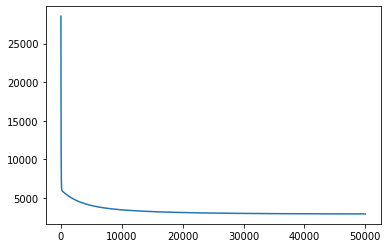

In [18]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [19]:
W, b

(array([  41.74222354, -203.23307037,  509.53421331,  325.08990028,
         -70.71055371, -119.46519079, -216.06752495,  144.56977324,
         376.44749606,  111.97689845]),
 151.3729659195748)

### (10) test 데이터에 대한 성능 확인하기
* test 데이터에 대한 성능을 확인해주세요.

In [20]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2866.7590846998123

### (11) 정답 데이터와 예측한 데이터 시각화하기
* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

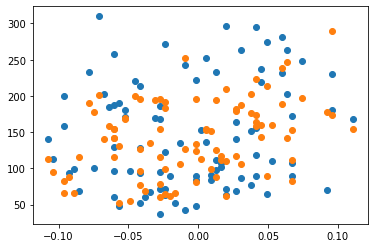

In [32]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)

### lr을 작게 주고 학습을 조금만 시켜보면 알겠지만, 회귀모델이기에 직선을 따라가려는 성질이 있다.
### 따라서, 위 그래프는 학습을 잘 했다-라고 생각하기보다는 직선의 분산을 높여서 오차만 줄였다-라고 보는게 맞다
### 때문에, 비선형의 특징을 잡아낼 수 있는 다른 모델을 고려해야한다.

### 혹은, 독립변수 10개가 유기적으로 선형결합하여 타겟변수와 특정한 선형성을 띄울 수 있는가??

In [22]:
a = diabetes.data
b = diabetes.target

df_x = pd.DataFrame(a)
df_y = target = pd.DataFrame(b)

In [23]:
columns = diabetes['feature_names']
columns

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [24]:
df_x.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
df_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [25]:
df_y.columns = ['target']
df_y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


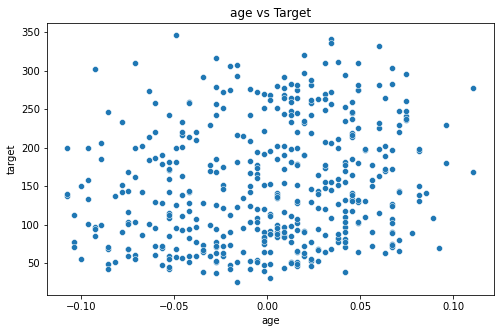

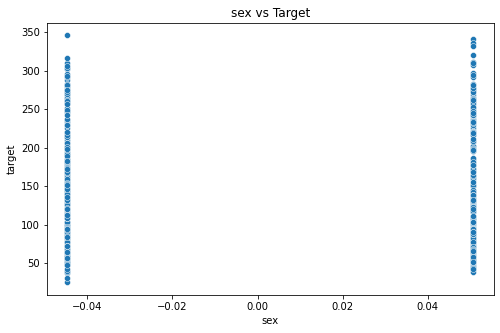

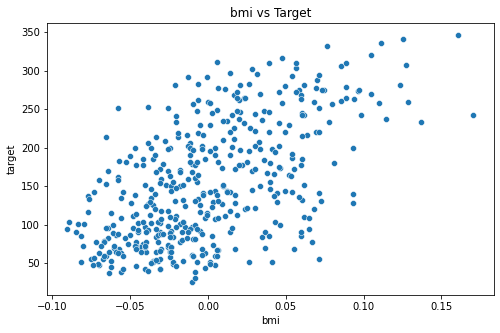

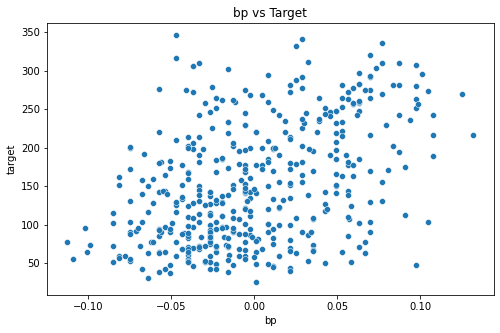

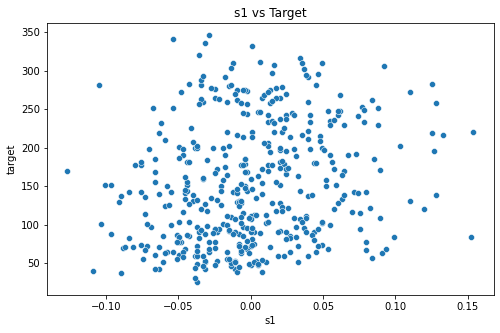

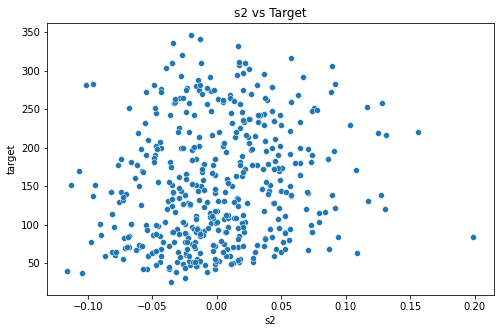

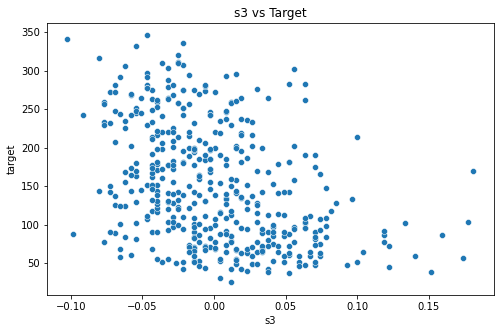

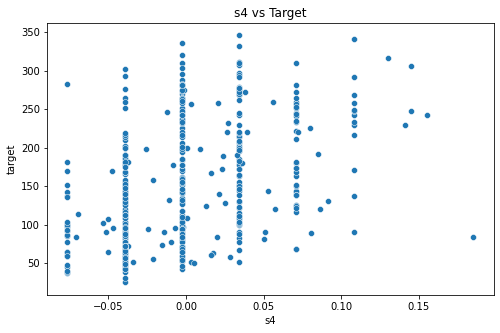

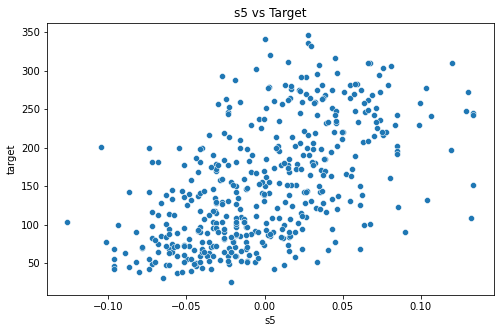

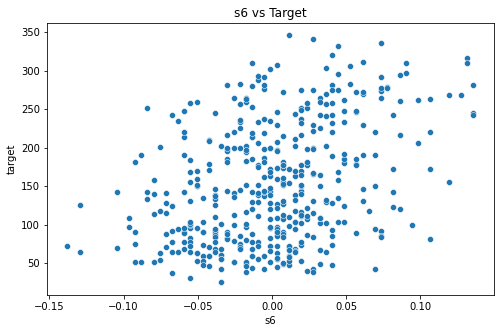

In [26]:
for i in df_x.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_x[i], y=df_y['target'])
    plt.title(f"{i} vs Target")

#### 이미 정규화가 된 데이터이고, 조금만 보수적으로 잡아도 선형관계를 특정할 수 있는 변수의 데이터 분포는 많이 없어보인다. 